#  환자 데이터를 바탕으로 유방암인지 아닌지를 구분해보자!

In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [599]:
from sklearn.datasets import load_breast_cancer

In [600]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [601]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [602]:
X = data.data
y = data.target

In [603]:
X.shape, y.shape

((569, 30), (569,))

In [604]:
from sklearn.model_selection import train_test_split

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

In [606]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


- 1. 신경망 구조 설계
- 2. 학습/평가 방법 설정
- 3. 학습 및 시각화
- 4. 평가

In [607]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [608]:
#1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층(Dense)
# 첫 입력층(데이터의 특성 개수) input_dim(17) , 10(다음 층 뉴런 10개)
# activation : 활성화함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)

model.add(Dense(1000, input_dim=30, activation="sigmoid"))

# 중간층
model.add(Dense(50, activation="sigmoid")) # 하나의 층

# 출력층
# 출력층은 회귀(활성화함수x), 2진분류(sigmoid), 다중분류에 따라서 사용하는 함수가 달라짐
model.add(Dense(1, activation="sigmoid")) 

model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 1000)              31000     
_________________________________________________________________
dense_155 (Dense)            (None, 50)                50050     
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 51        
Total params: 81,101
Trainable params: 81,101
Non-trainable params: 0
_________________________________________________________________


## activation(활성화함수) - 자극에 대한 반응여부를 결정하는 함수
- 1. 회귀 : linear(항등함수) -> 신경망에서 도출된 수치값을 그대로 예측에 사용
- 2. 분류 -> 딥러닝은 선형 모델을 기반으로 하고 있기 때문에 여기서 도출된 수치 값으로는 분류 문제를 예측하기 힘듦
    - 분류 모델은 확률 정보를 가지고 판단하는 것이 더욱 정확
    - 이진분류 : sigmoid -> 0또는 1로 분류(0.5를 기준으로 높고 낮은지에 대한 확률 정보를 바탕으로 최종 출력을 결정)

### 신경망 학습/평가 방법 설정

In [609]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model.compile(loss="binary_crossentropy",  
             optimizer = "Adam",   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]      # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

###  학습 및 학습과정 

In [610]:
h = model.fit(X_train, y_train, epochs=150) # epochs : 학습 횟수를 설정

Train on 426 samples
Epoch 1/150
426/426 [==============================] - 0s 695us/sample - loss: 0.6148 - acc: 0.6268
Epoch 2/150
426/426 [==============================] - 0s 77us/sample - loss: 0.5578 - acc: 0.6972
Epoch 3/150
426/426 [==============================] - 0s 80us/sample - loss: 0.5355 - acc: 0.8169
Epoch 4/150
426/426 [==============================] - 0s 77us/sample - loss: 0.5504 - acc: 0.7629
Epoch 5/150
426/426 [==============================] - 0s 89us/sample - loss: 0.5070 - acc: 0.8380
Epoch 6/150
426/426 [==============================] - 0s 73us/sample - loss: 0.4856 - acc: 0.8638
Epoch 7/150
426/426 [==============================] - 0s 68us/sample - loss: 0.4780 - acc: 0.8568
Epoch 8/150
426/426 [==============================] - 0s 73us/sample - loss: 0.4508 - acc: 0.8756
Epoch 9/150
426/426 [==============================] - 0s 68us/sample - loss: 0.4781 - acc: 0.8286
Epoch 10/150
426/426 [==============================] - 0s 68us/sample - loss: 0.4548 -

426/426 [==============================] - 0s 68us/sample - loss: 0.3087 - acc: 0.8803
Epoch 83/150
426/426 [==============================] - 0s 75us/sample - loss: 0.3000 - acc: 0.8873
Epoch 84/150
426/426 [==============================] - 0s 68us/sample - loss: 0.2887 - acc: 0.8991
Epoch 85/150
426/426 [==============================] - 0s 77us/sample - loss: 0.2776 - acc: 0.8850
Epoch 86/150
426/426 [==============================] - 0s 70us/sample - loss: 0.3246 - acc: 0.8521
Epoch 87/150
426/426 [==============================] - 0s 66us/sample - loss: 0.2829 - acc: 0.8967
Epoch 88/150
426/426 [==============================] - 0s 73us/sample - loss: 0.2726 - acc: 0.8967
Epoch 89/150
426/426 [==============================] - 0s 66us/sample - loss: 0.3188 - acc: 0.8545
Epoch 90/150
426/426 [==============================] - 0s 68us/sample - loss: 0.2839 - acc: 0.8850
Epoch 91/150
426/426 [==============================] - 0s 63us/sample - loss: 0.2915 - acc: 0.8826
Epoch 92/150


### 시각화

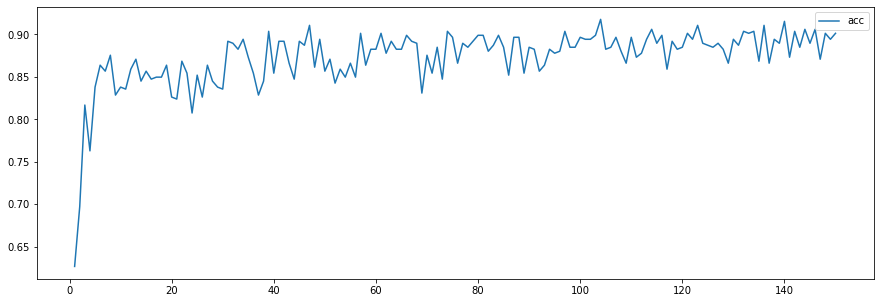

In [611]:
# 시각화
plt.figure(figsize=(15,5))

# 라인 차트를 생성
plt.plot(range(1,151),  # epochs 가 100까지 설정을 했기 때문에
            h.history['acc'],    # history : 학습시 출력되는 loss 혹은 정확도 값을 가져오기 위한 명령
            label='acc')
plt.legend() # 범례표시
plt.show()

### 모델평가 

In [612]:
model.evaluate(X_test, y_test)

143/143 [==============================] - 0s 513us/sample - loss: 0.2567 - acc: 0.9231


[0.2566849012058098, 0.9230769]